In [11]:
### Script to read shoes dataset downloaded from ... into a tensor

import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# open folder
root = '../../shoeData'

# for each folder open sub dir (each sub dir is a label)
folders = {'Boots': 0, 'Sandals': 1, 'Shoes': 2, 'Slippers' : 3}

#The "word" labels
Labels = ['Boots','Sandals', 'Shoes', 'Slippers']
finegrainLabels = []
subfinegrainLabels = []

#The data and numberical label
imList = []
labelList = [] #Boots, Sandals, Shoes, Slippers
finegrainLabelList = [] #Fine grain subcategories
subfinegrainLabelList = [] #FinER grain subcategories

fineLabelCounter = 0
subfineLabelCounter = 0
for folder in folders:
    print 'processing ',folder,' folder...'
    subfolders = os.listdir(os.path.join(root, folder))
    for subfolder in subfolders:
        subsubfolders = os.listdir(os.path.join(root, folder, subfolder))
        for subsubfolder in subsubfolders:
            images = os.listdir(os.path.join(root, folder, subfolder, subsubfolder))
            for image in images:
                if image.endswith('.jpg'):
                    im = imread(os.path.join(root, folder, subfolder, subsubfolder, image))
                    if np.shape(im) == (136, 136, 3): #one image was (135, 135, 3)
                        imList.append(im)
                        labelList.append(folders[folder])
                        finegrainLabelList.append(fineLabelCounter)
                        subfinegrainLabelList.append(subfineLabelCounter)
            subfineLabelCounter+=1
            subfinegrainLabels.append(folder+'_'+subfolder+'_'+subsubfolder)
        fineLabelCounter+=1
        finegrainLabels.append(folder+'_'+subfolder)

In [3]:
print 'labels:', folders
print 'fine grain labels:', finegrainLabels[:10]
print 'sub fine grain labels:', subfinegrainLabels[:10]

labels: {'Slippers': 3, 'Sandals': 1, 'Shoes': 2, 'Boots': 0}
fine grain labels: ['Slippers_Boot', 'Slippers_Slipper Flats', 'Slippers_Slipper Heels', 'Sandals_Athletic', 'Sandals_Flat', 'Sandals_Heel', 'Shoes_Boat Shoes', 'Shoes_Clogs and Mules', 'Shoes_Crib Shoes', 'Shoes_Firstwalker']
sub fine grain labels: ['Slippers_Boot_Acorn', 'Slippers_Boot_Baffin', 'Slippers_Boot_Boots', 'Slippers_Boot_Foamtreads', 'Slippers_Boot_Minnetonka', 'Slippers_Boot_Old Friend', 'Slippers_Boot_Slippers', 'Slippers_Boot_UGG Kids', 'Slippers_Slipper Flats_Acorn', 'Slippers_Slipper Flats_Acorn Kids']


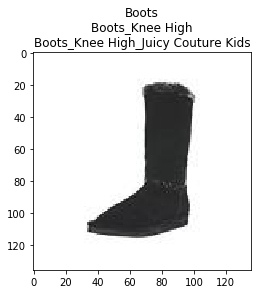

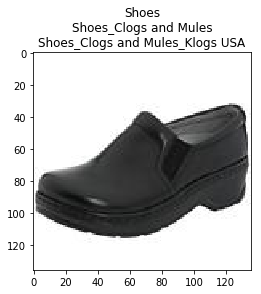

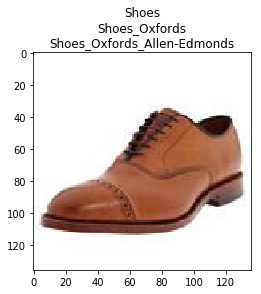

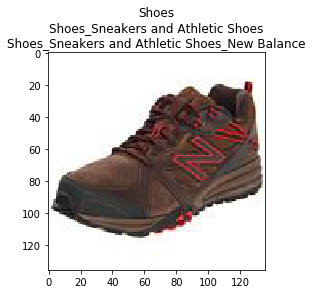

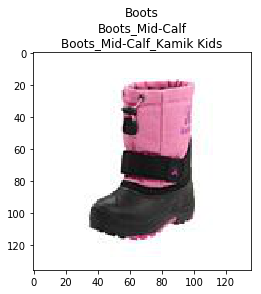

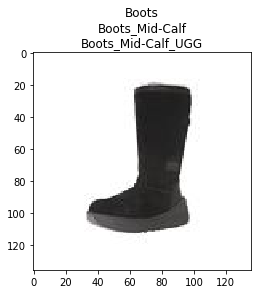

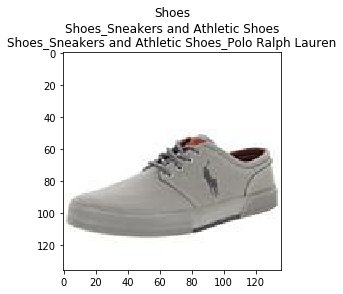

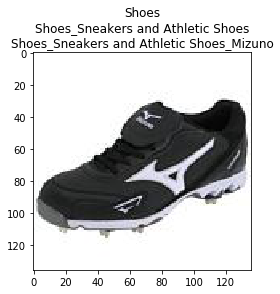

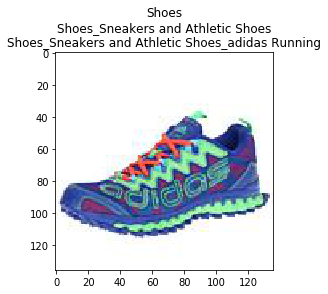

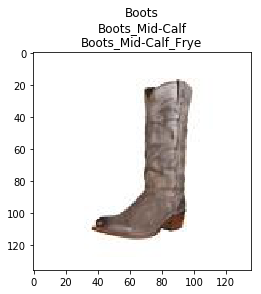

In [4]:
#show 10 examples
for i in range(10):
    eg = np.random.randint(len(imList))
    plt.figure()
    plt.imshow(imList[eg])
    eg_label = Labels[labelList[eg]]
    eg_fineLabel = finegrainLabels[finegrainLabelList[eg]]
    eg_subfineLabel = subfinegrainLabels[subfinegrainLabelList[eg]]
    plt.title(eg_label+'\n'+eg_fineLabel+'\n'+eg_subfineLabel)

In [7]:
#print out image details
imTensor = np.asarray(imList)
print 'imTensor shape:', np.shape(imTensor)
labelTensor = np.asarray(labelList)
print 'Label Tensor shape:', np.shape(labelTensor)
fineLabelTensor = np.asarray(finegrainLabelList)
print np.shape(fineLabelTensor)
subfineLabelTensor = np.asarray(subfinegrainLabelList)
print np.shape(subfineLabelTensor)

print 'imTensor range: [',imTensor.min(), imTensor.max(), ']'
print 'im Labels set: {', np.unique(labelTensor),'}'
print 'fine Labels set: {', np.unique(fineLabelTensor), '}'
print 'sub fine Labels set: {', np.unique(subfineLabelTensor), '}'


imTensor shape: (50078, 136, 136, 3)
Label Tensor shape: (50078,)
(50078,)
(50078,)
imTensor range: [ 0 255 ]
im Labels set: { [0 1 2 3] }
fine Labels set: { [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] }
sub fine Labels set: { [   0    1    2 ..., 3079 3080 3081] }


In [6]:
#save the image, and label lists as tensors
np.save('../../InData/SHOES/xShoes.npy', imTensor)
np.save('../../InData/SHOES/yShoes.npy', labelTensor)
np.save('../../InData/SHOES/fineYShoes.npy', fineLabelTensor)
np.save('../../InData/SHOES/subfineYShoes.npy', subfineLabelTensor)

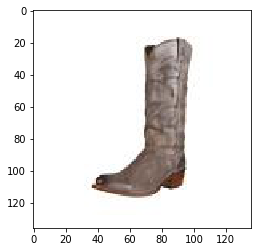

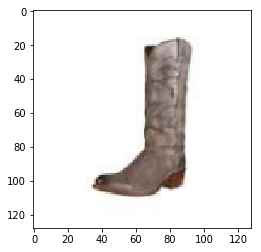

In [19]:
im = imTensor[eg]
im128 = resize(im, (128,128))
plt.imshow(im)
plt.figure()
plt.imshow(im128)

In [ ]:
#Load and shuffel the datasets
xShoes = np.load('../../InData/SHOES/xShoes.npy')
yShoes = np.load('../../InData/SHOES/yShoes.npy')
fineY = np.load('../../InData/SHOES/fineYShoes.npy')
subfineY = np.load('../../InData/SHOES/subfineYShoes.npy')

